## Python for Data Analysis - C02

### 3. Baby Names (2000 - 2010)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names2010 = pd.read_csv('data/names/yob2010.txt', names=['name', 'sex', 'births'])
names2010.head()

,name,sex,births
0,Isabella,F,22731
1,Sophia,F,20477
2,Emma,F,17179
3,Olivia,F,16860
4,Ava,F,15300


In [3]:
names2010.shape

(33838, 3)

In [4]:
names2010.groupby('sex').births.sum()

sex
F    1759010
M    1898382
Name: births, dtype: int64

### 년도별 데이터 합치기

In [5]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

In [6]:
for year in years:
    path = 'data/names/yob%d.txt' % year
    df = pd.read_csv(path, names=columns)

    df['year'] = year
    pieces.append(df)

In [7]:
# 하나의 dataframe으로 취합. 
names = pd.concat(pieces, ignore_index=True)  # ignore_index : 원래의 행순서 상관없음.
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [8]:
names.tail()

,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [9]:
total = names.groupby(['year', 'sex']).births.sum()
total.head(10)

year  sex
1880  F       90993
      M      110493
1881  F       91955
      M      100748
1882  F      107851
      M      113687
1883  F      112322
      M      104632
1884  F      129021
      M      114445
Name: births, dtype: int64

In [10]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


### 성별, 연도별 출생 트렌드

<Figure size 432x288 with 0 Axes>

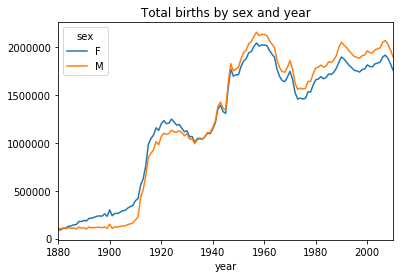

In [11]:
plt.figure()
total_births.plot(title='Total births by sex and year')

In [12]:
# 년도별 성별 그룹핑

In [13]:
ysGrouped = names.groupby(['year', 'sex'])

g = []
for name, group in ysGrouped:
    g.append(name)
    
print(g[:10])

[(1880, 'F'), (1880, 'M'), (1881, 'F'), (1881, 'M'), (1882, 'F'), (1882, 'M'), (1883, 'F'), (1883, 'M'), (1884, 'F'), (1884, 'M')]


In [14]:
ysGrouped.get_group((2000,'F')).head()   # 특정 그룹에 속한 데이터

,name,sex,births,year
1332172,Emily,F,25949,2000
1332173,Hannah,F,23066,2000
1332174,Madison,F,19965,2000
1332175,Ashley,F,17991,2000
1332176,Sarah,F,17677,2000


In [15]:
# 각 이름이 각 그룹에서 차지하는 비율

In [16]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

In [17]:
names = ysGrouped.apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [18]:
# 그룹별로 비율의 합이 1이 맞는지 확인

In [19]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [20]:
# 그룹별로 사용 빈도수가 높은 이름 1000 개 추출

In [21]:
def get_top1000(group):
    #group = group[group['prop'] > 0.01]  # 사용 비율로 필터링.
    return group.sort_values(by='births', ascending=False)[:1000]

In [22]:
top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000.index = np.arange(len(top1000))
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [23]:
top1000.tail()

,name,sex,births,year,prop
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102
261876,Maxton,M,193,2010,0.000102


### 이름 유행 분석

In [24]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [25]:
girls.shape

(130880, 5)

In [26]:
girls.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [27]:
# pandas groupby --> dataframe --> sort

In [28]:
girlsRating = pd.DataFrame(girls.groupby('name').births.sum())
girlsRating.sort_values(by='births', ascending=False).head()

,births
name,
Mary,4103935
Patricia,1568737
Elizabeth,1561874
Jennifer,1454725
Linda,1448771


In [29]:
# 각 이름의 년도별 사용 트렌드

In [30]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.tail()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN
2009,1265.0,4352.0,270.0,7936.0,NaN,NaN,296.0,NaN,307.0,369.0,...,NaN,5120.0,3981.0,496.0,NaN,NaN,NaN,NaN,NaN,NaN
2010,448.0,4628.0,438.0,7374.0,226.0,NaN,277.0,NaN,295.0,324.0,...,NaN,6200.0,5164.0,504.0,NaN,NaN,NaN,NaN,NaN,258.0


In [31]:
# 여자 이름 상위 5개

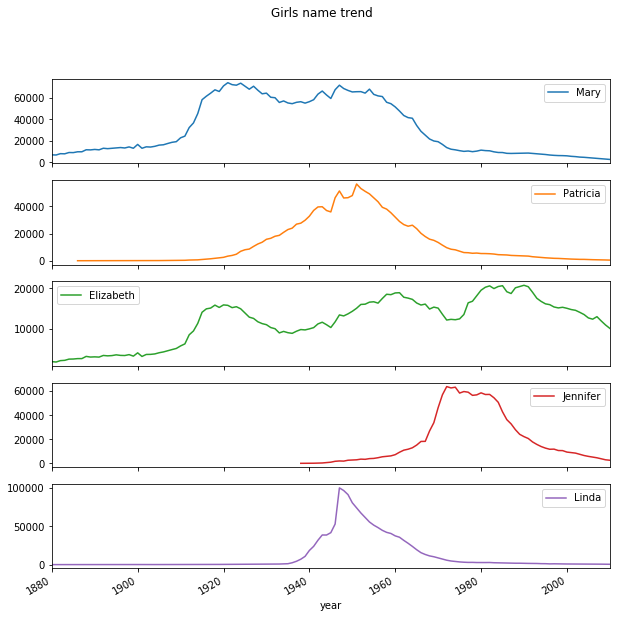

In [32]:
subset = total_births[['Mary', 'Patricia', 'Elizabeth', 'Jennifer', 'Linda']]
subset.plot(subplots=True, figsize=(10,10), grid=False, title='Girls name trend')
plt.show()

In [33]:
# 상위 이름 1000개가 전체에서 차지하는 비율

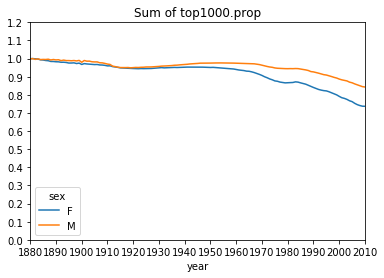

In [34]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of top1000.prop',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [35]:
# 년도별 사용하는 이름 갯수 - 점점 더 다양한 이름을 사용하는 경향

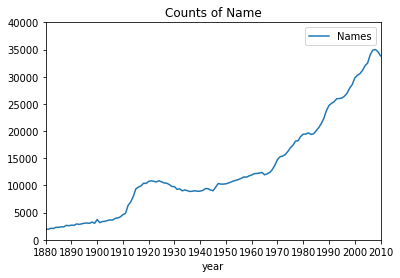

In [36]:
nameCounts = pd.DataFrame(names.groupby('year').size())
nameCounts.columns = ['Names']
nameCounts.plot(title='Counts of Name', yticks=np.linspace(0, 40000, 9), xticks=range(1880, 2020, 10))

In [37]:
# 남녀별 사용하는 이름의 다양성 비교 (전체의 50% 차지하는 이름의 갯수)

In [38]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)    # 그룹별 prop 기준 정렬
    return group.prop.cumsum().values.searchsorted(q) + 1   # prop 누계가 0.5인 index 찾기

In [39]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')   # 결과를 표로 재배치
diversity.tail()

sex,F,M
year,,
2006,209,99
2007,223,103
2008,234,109
2009,241,114
2010,246,117


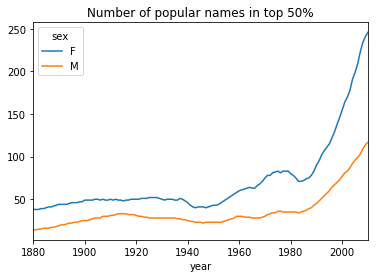

In [40]:
diversity.plot(title="Number of popular names in top 50%")
# 여자 이름이 남자 이름보다 더 다양. 시간이 흐를수록 다양성 높아짐.

### 마지막 글자의 변화

In [41]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

In [42]:
# 년도별, 성별 마지막 글자

In [43]:
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   

sex                                                                      \
year             2004      2005      2006      2007      2008      2009   
last_letter                                                               
a             38650.0   36838.0   36156.0   34654.0   32901.0   31430.0   
b             45914.0   43144.0   42600.0   42123.0   39945.0   38862.0   
c             26778.0   26078.0   26635.0   26864.0   25318.0   24048.0   
d             51754.0   50670.0   51410.0   50595.0   47910.0   46172.0   
e            142098.0  141123.0  142999.0  143698.0  140966.0  135496.0   

sex                    
year             2010  
last_letter            
a             28438.0  
b             38859.0  
c             23125.0  
d             44398.0  
e            129012.0  

[5 rows x 262 columns]

In [44]:
subtable = table.reindex(columns=[1950, 2010], level='year') # year 컬럼 기준으로 binning
subtable.head()

sex                 F                   M          
year             1950      2010      1950      2010
last_letter                                        
a            576481.0  670605.0    4037.0   28438.0
b                17.0     450.0    1632.0   38859.0
c                16.0     946.0    6500.0   23125.0
d              4413.0    2607.0  263643.0   44398.0
e            376863.0  313833.0  168659.0  129012.0

In [45]:
letter_prop = subtable / subtable.sum().astype(float)

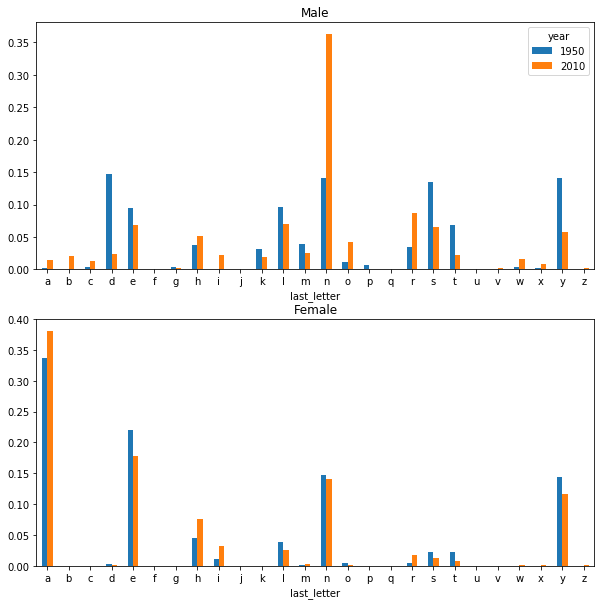

In [46]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [47]:
# 남자이름 d,n,r,s,y - 급격한 변화. 년도별 추세 확인.

In [48]:
letter_prop = table / table.sum().astype(float)
ts_5 = letter_prop.loc[['d', 'n', 'r', 's', 'y'], 'M'].T
ts_5.head()

last_letter,d,n,r,s,y
year,,,,,
1880,0.083055,0.153213,0.067461,0.167006,0.075760
1881,0.083247,0.153214,0.072190,0.162495,0.077451
1882,0.085340,0.149560,0.070263,0.160441,0.077537
1883,0.084066,0.151646,0.071775,0.158116,0.079144
1884,0.086120,0.149915,0.078492,0.154764,0.080405


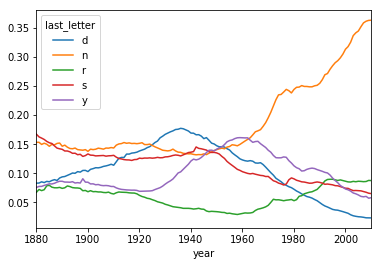

In [49]:
plt.close('all')
ts_5.plot()   # 1960년대 이후로 n으로 끝나는 남자이름 급격한 증가.

### 첫글자의 변화 추세

In [50]:
get_first_letter = lambda x: x[0]
first_letters = names.name.map(get_first_letter)
first_letters.name = 'first_letter'

In [51]:
table = names.pivot_table('births', index=first_letters, columns=['sex', 'year'], aggfunc=sum)
table.head()

sex                 F                                                        \
year             1880     1881     1882     1883     1884     1885     1886   
first_letter                                                                  
A              9334.0   9405.0  11001.0  11632.0  13324.0  13437.0  14416.0   
B              3874.0   4013.0   4824.0   5194.0   6005.0   6340.0   6990.0   
C              5868.0   5661.0   6454.0   6857.0   7919.0   8164.0   8412.0   
D              2218.0   2299.0   2557.0   2709.0   3060.0   3031.0   3231.0   
E             11444.0  11742.0  13771.0  14449.0  16465.0  17379.0  18825.0   

sex                                      ...         M                      \
year             1887     1888     1889  ...      2001      2002      2003   
first_letter                             ...                                 
A             14836.0  17729.0  17689.0  ...  189874.0  195896.0  208421.0   
B              7110.0   8775.0   8744.0  ...  102260.0  102009.0  103251.0   
C              8605.0  10412.0  10257.0  ...  176796.0  171727.0  176042.0   
D              3144.0   3852.0   3732.0  ...  154619.0  151285.0  153742.0   
E             19140.0  23258.0  23244.0  ...   84224.0   90358.0   94306.0   

sex                                                                       \
year              2004      2005      2006      2007      2008      2009   
first_letter                                                               
A             214679.0  216042.0  224793.0  225091.0  220998.0  211190.0   
B             104295.0  105325.0  108233.0  111282.0  112743.0  109937.0   
C             176323.0  175163.0  179372.0  182358.0  181352.0  178370.0   
D             149913.0  148518.0  149656.0  149211.0  139763.0  131635.0   
E              99243.0   99529.0  100967.0  103119.0  103479.0  103128.0   

sex                     
year              2010  
first_letter            
A             198870.0  
B             108460.0  
C             168356.0  
D             123298.0  
E             102513.0  

[5 rows x 262 columns]

In [52]:
subtable = table.reindex(columns=[1950, 2010], level='year') # year 컬럼 기준으로 binning
subtable.head()

sex                  F                   M          
year              1950      2010      1950      2010
first_letter                                        
A              60581.0  309608.0   64834.0  198870.0
B             118942.0   64191.0   55989.0  108460.0
C             160638.0   96780.0   92828.0  168356.0
D             139818.0   47211.0  189534.0  123298.0
E              62897.0  118824.0   56076.0  102513.0

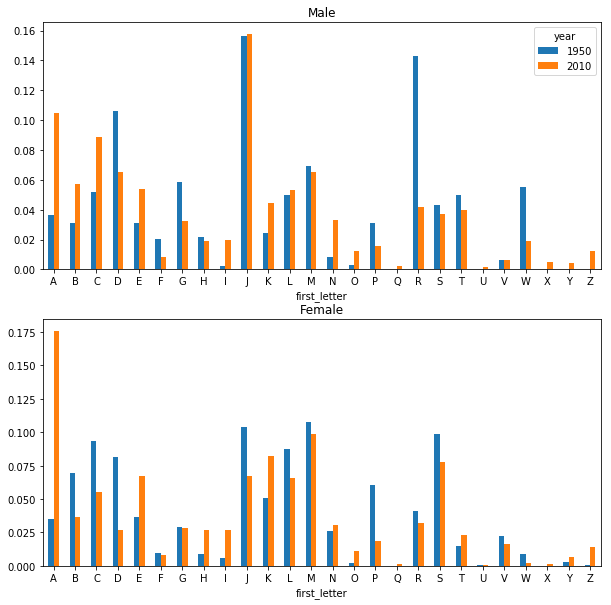

In [53]:
letter_prop = subtable / subtable.sum().astype(float)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [54]:
letter_prop = table / table.sum().astype(float)
ts_5 = letter_prop.loc[['A', 'D', 'J', 'P', 'Z'], 'F'].T
ts_5.head()

first_letter,A,D,J,P,Z
year,,,,,
1880,0.102579,0.024376,0.041772,0.011693,0.002099
1881,0.102278,0.025001,0.041466,0.012441,0.002284
1882,0.102002,0.023709,0.041641,0.013370,0.002281
1883,0.103559,0.024118,0.041061,0.013924,0.002146
1884,0.103270,0.023717,0.040606,0.014641,0.002558


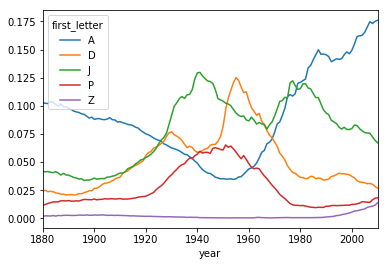

In [55]:
plt.close('all')
ts_5.plot()   
# 1920 ~ 60년대에는 A 대신 D 또는 J 로 시작하는 이름이 유행. 
# 1990년대에 Z로 시작하는 이름을 많이 사용하기 시작.